In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler

In [2]:
train = pd.read_csv('Data/train.csv') 
test = pd.read_csv('Data/test.csv')
test_id = test['id']
train = train.drop(columns=['id'])
test = test.drop(columns=['id'])
train.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,50.0,0,0,Yes,Private,Rural,88.10,29.1,formerly smoked,0
1,Female,52.0,0,0,Yes,Private,Rural,80.07,38.9,smokes,0
2,Female,26.0,0,0,No,Govt_job,Urban,89.11,23.3,smokes,0
3,Female,37.0,0,0,Yes,Private,Rural,81.36,36.1,never smoked,0
4,Male,59.0,0,0,Yes,Private,Rural,82.59,29.6,never smoked,1
5,Male,57.0,0,0,Yes,Private,Rural,92.04,33.5,never smoked,0
6,Male,3.0,0,0,No,children,Rural,97.32,16.9,Unknown,0
7,Female,32.0,0,0,Yes,Private,Urban,85.04,41.2,smokes,0
8,Male,24.0,0,0,No,Private,Rural,98.23,22.3,smokes,0
9,Female,60.0,0,0,Yes,Self-employed,Urban,57.57,35.9,smokes,0


In [3]:
print(train.isna().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [4]:
duplicates = train.duplicated(subset=train.columns.difference(['id']))
print("Duplicates:" , duplicates.sum())
train.info()

Duplicates: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12243 entries, 0 to 12242
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             12243 non-null  object 
 1   age                12243 non-null  float64
 2   hypertension       12243 non-null  int64  
 3   heart_disease      12243 non-null  int64  
 4   ever_married       12243 non-null  object 
 5   work_type          12243 non-null  object 
 6   Residence_type     12243 non-null  object 
 7   avg_glucose_level  12243 non-null  float64
 8   bmi                12243 non-null  float64
 9   smoking_status     12243 non-null  object 
 10  stroke             12243 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.0+ MB


In [5]:
train.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,12243.000000,12243.000000,12243.000000,12243.000000,12243.000000,12243.00000
mean,41.344951,0.049416,0.023279,88.820804,28.074400,0.04133
std,21.518463,0.216744,0.150793,24.957986,6.707892,0.19906
min,0.080000,0.000000,0.000000,55.220000,10.300000,0.00000
25%,25.000000,0.000000,0.000000,74.880000,23.500000,0.00000
50%,43.000000,0.000000,0.000000,85.030000,27.600000,0.00000
75%,57.000000,0.000000,0.000000,96.840000,31.900000,0.00000
max,82.000000,1.000000,1.000000,267.600000,80.100000,1.00000


In [6]:
train['stroke'].value_counts()

stroke
0    11737
1      506
Name: count, dtype: int64

<Axes: xlabel='stroke'>

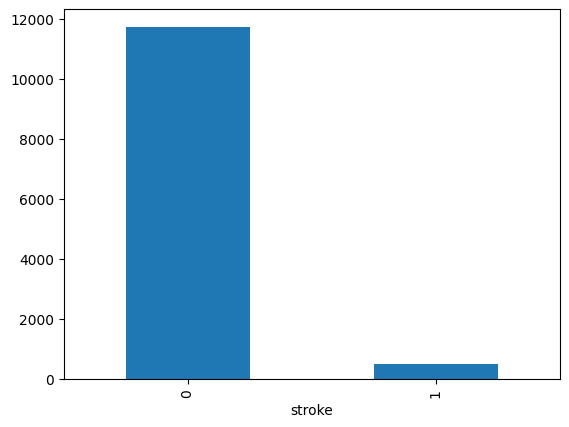

In [7]:
train['stroke'].value_counts().plot(kind='bar')

In [8]:
train['gender'].value_counts()

gender
Female    7563
Male      4679
Other        1
Name: count, dtype: int64

In [9]:
train['gender'] = train['gender'].replace('Other', 'Female')
train['gender'].value_counts()

gender
Female    7564
Male      4679
Name: count, dtype: int64

<Axes: xlabel='stroke', ylabel='count'>

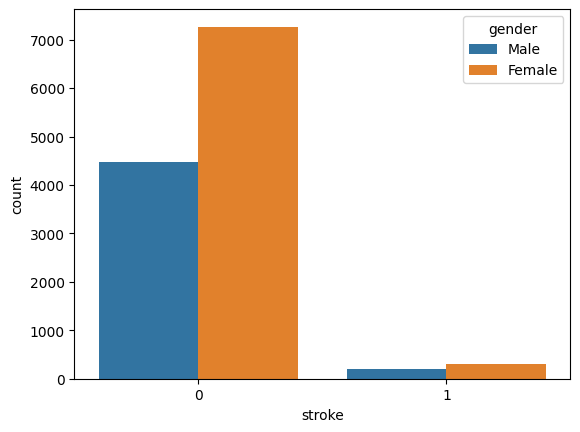

In [10]:
sns.countplot(x='stroke', hue='gender', data=train)

In [11]:
train['hypertension'].value_counts()

hypertension
0    11638
1      605
Name: count, dtype: int64

<Axes: xlabel='stroke', ylabel='count'>

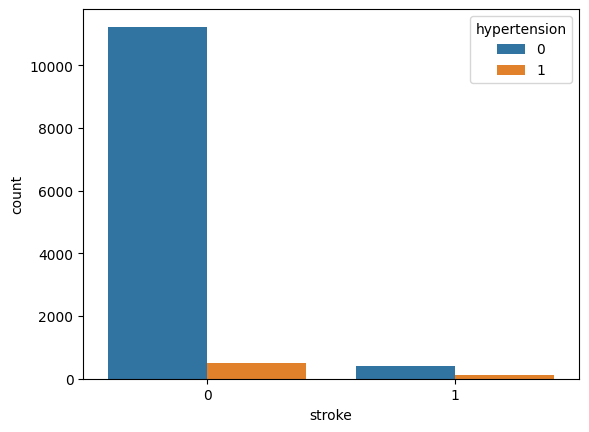

In [12]:
sns.countplot(x='stroke', hue='hypertension', data=train)

In [13]:
train['heart_disease'].value_counts()

heart_disease
0    11958
1      285
Name: count, dtype: int64

<Axes: xlabel='stroke', ylabel='count'>

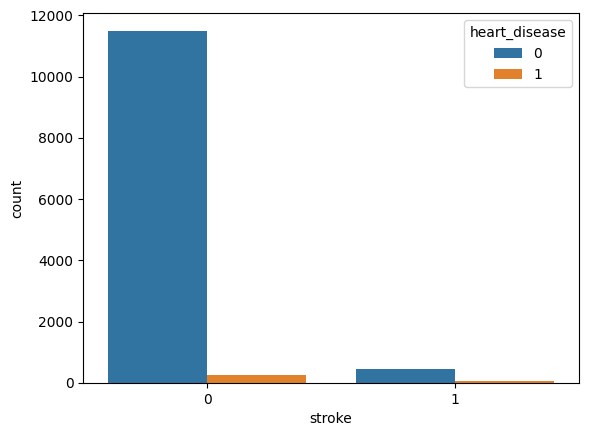

In [14]:
sns.countplot(x='stroke', hue='heart_disease', data=train)

In [15]:
train['ever_married'].value_counts()

ever_married
Yes    8275
No     3968
Name: count, dtype: int64

<Axes: xlabel='stroke', ylabel='count'>

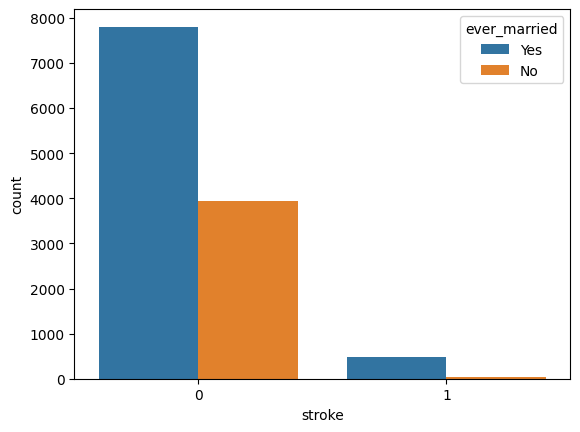

In [16]:
sns.countplot(x='stroke', hue='ever_married', data=train)

In [17]:
train['Residence_type'].value_counts()

Residence_type
Urban    6124
Rural    6119
Name: count, dtype: int64

<Axes: xlabel='stroke', ylabel='count'>

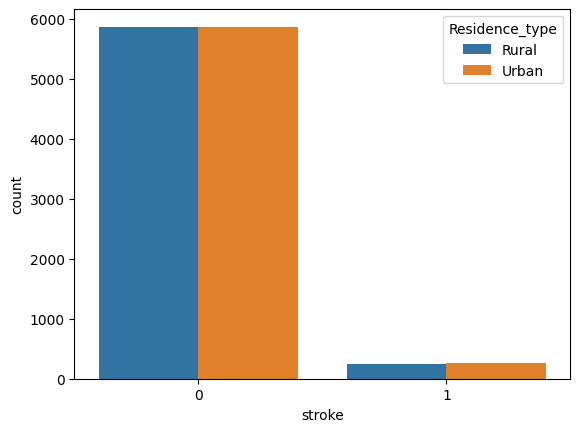

In [18]:
sns.countplot(x='stroke', hue='Residence_type', data=train)

In [19]:
train['work_type'].value_counts()

work_type
Private          7791
children         1667
Self-employed    1539
Govt_job         1215
Never_worked       31
Name: count, dtype: int64

<Axes: xlabel='stroke', ylabel='count'>

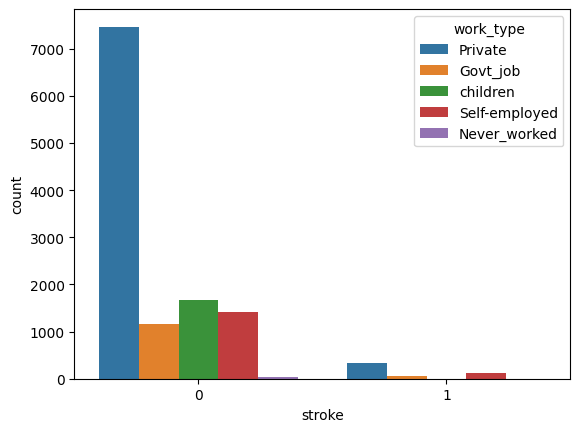

In [20]:
sns.countplot(x='stroke', hue='work_type', data=train)

In [21]:
train['smoking_status'].value_counts()

smoking_status
never smoked       5029
Unknown            3651
formerly smoked    1839
smokes             1724
Name: count, dtype: int64

<Axes: xlabel='stroke', ylabel='count'>

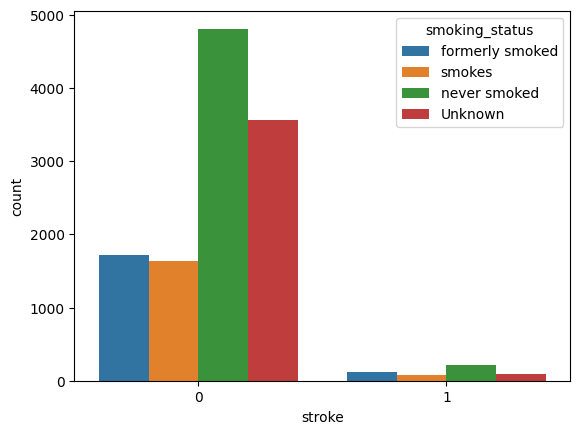

In [22]:
sns.countplot(x='stroke', hue='smoking_status', data=train)

In [23]:
for col in ['bmi', 'avg_glucose_level', 'age']:
    mean = train[col].mean()
    std = train[col].std()
    z_scores = np.abs((train[col] - mean) / std)
    outlier_count = (z_scores > 3).sum()
    print(f"Outlier trong {col}: {outlier_count} ({outlier_count/len(train)*100:.2f}%)")



Outlier trong bmi: 97 (0.79%)
Outlier trong avg_glucose_level: 302 (2.47%)
Outlier trong age: 0 (0.00%)


<Axes: xlabel='age', ylabel='Count'>

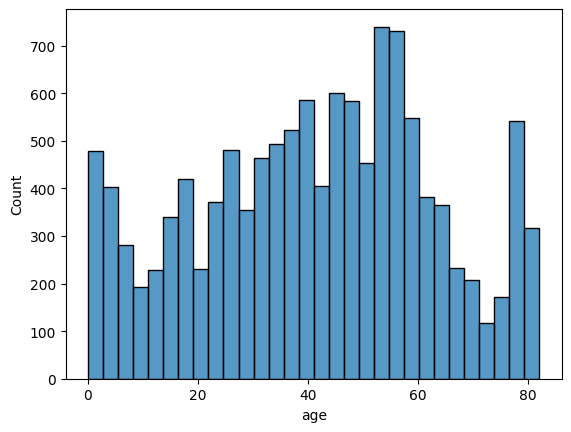

In [24]:
sns.histplot(data=train['age'])

<Axes: ylabel='age'>

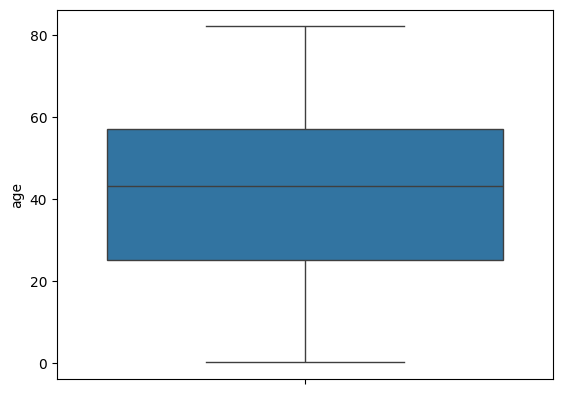

In [25]:
sns.boxplot(data=train['age'])

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

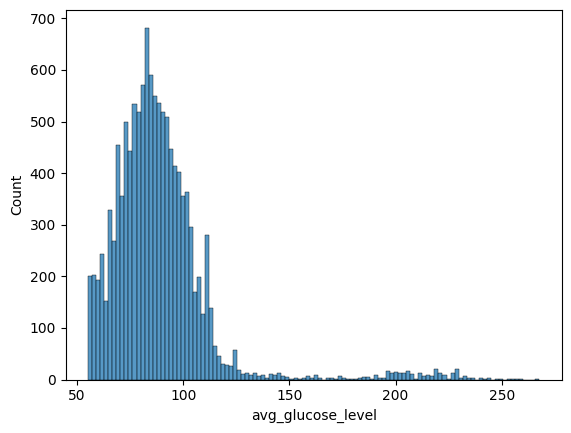

In [26]:
sns.histplot(data=train['avg_glucose_level'])

<Axes: ylabel='avg_glucose_level'>

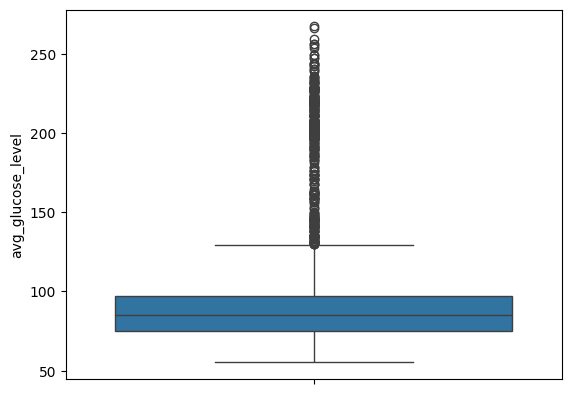

In [27]:
sns.boxplot(data=train['avg_glucose_level'])

<Axes: xlabel='bmi', ylabel='Count'>

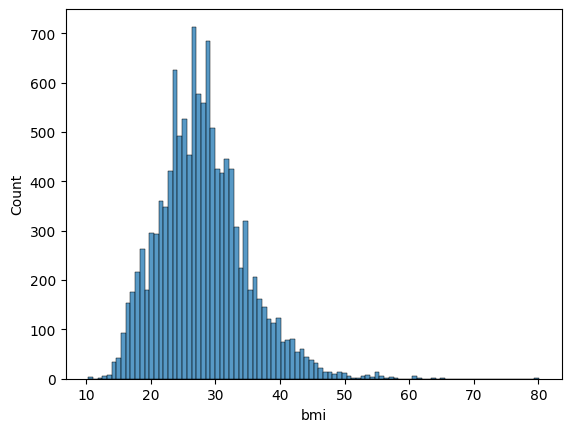

In [28]:
sns.histplot(data=train['bmi'])

<Axes: ylabel='bmi'>

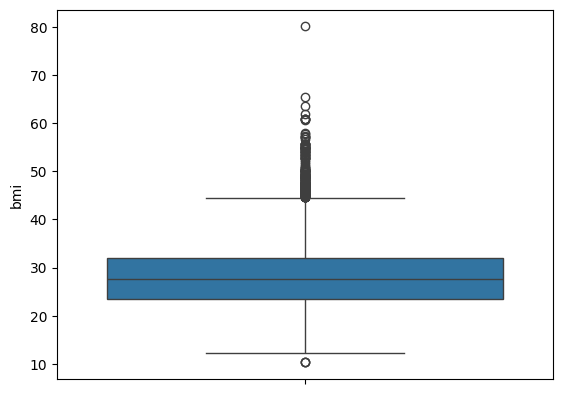

In [29]:
sns.boxplot(data=train['bmi'])

In [30]:
numeric_cols = ['bmi', 'avg_glucose_level']
for col in numeric_cols:
    mean = train[col].mean()
    std = train[col].std()
    lb = mean - 3 * std
    ub = mean + 3 * std
    train[col] = train[col].clip(lower=lb, upper=ub)
    test[col] = test[col].clip(lower=lb, upper=ub)

In [31]:
le = LabelEncoder()
for col in ['gender', 'Residence_type', 'ever_married']:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])
train.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,50.0,0,0,1,Private,0,88.10,29.1,formerly smoked,0
1,0,52.0,0,0,1,Private,0,80.07,38.9,smokes,0
2,0,26.0,0,0,0,Govt_job,1,89.11,23.3,smokes,0
3,0,37.0,0,0,1,Private,0,81.36,36.1,never smoked,0
4,1,59.0,0,0,1,Private,0,82.59,29.6,never smoked,1


In [32]:
# train['stroke'] = train['stroke'].astype(str)
train = pd.get_dummies(train, columns=['work_type', 'smoking_status'], drop_first=True)
test = pd.get_dummies(test, columns=['work_type', 'smoking_status'], drop_first=True)
train.head(5)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,50.0,0,0,1,0,88.10,29.1,0,False,True,False,False,True,False,False
1,0,52.0,0,0,1,0,80.07,38.9,0,False,True,False,False,False,False,True
2,0,26.0,0,0,0,1,89.11,23.3,0,False,False,False,False,False,False,True
3,0,37.0,0,0,1,0,81.36,36.1,0,False,True,False,False,False,True,False
4,1,59.0,0,0,1,0,82.59,29.6,1,False,True,False,False,False,True,False


In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12243 entries, 0 to 12242
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          12243 non-null  int32  
 1   age                             12243 non-null  float64
 2   hypertension                    12243 non-null  int64  
 3   heart_disease                   12243 non-null  int64  
 4   ever_married                    12243 non-null  int32  
 5   Residence_type                  12243 non-null  int32  
 6   avg_glucose_level               12243 non-null  float64
 7   bmi                             12243 non-null  float64
 8   stroke                          12243 non-null  int64  
 9   work_type_Never_worked          12243 non-null  bool   
 10  work_type_Private               12243 non-null  bool   
 11  work_type_Self-employed         12243 non-null  bool   
 12  work_type_children              

In [34]:
train.head(5)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,50.0,0,0,1,0,88.10,29.1,0,False,True,False,False,True,False,False
1,0,52.0,0,0,1,0,80.07,38.9,0,False,True,False,False,False,False,True
2,0,26.0,0,0,0,1,89.11,23.3,0,False,False,False,False,False,False,True
3,0,37.0,0,0,1,0,81.36,36.1,0,False,True,False,False,False,True,False
4,1,59.0,0,0,1,0,82.59,29.6,1,False,True,False,False,False,True,False


In [35]:
oversample = RandomOverSampler(sampling_strategy='minority')
X=train.drop(['stroke'],axis=1)
y=train['stroke']

X_oversample, y_oversample = oversample.fit_resample(X, y)

In [36]:
numeric_cols = ['age', 'bmi', 'avg_glucose_level']
scaler = StandardScaler()
train[numeric_cols] = scaler.fit_transform(train[numeric_cols])
test[numeric_cols] = scaler.transform(test[numeric_cols])
train.head(5)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0.402231,0,0,1,0,0.020916,0.162586,0,False,True,False,False,True,False,False
1,0,0.495179,0,0,1,0,-0.385791,1.657329,0,False,True,False,False,False,False,True
2,0,-0.713135,0,0,0,1,0.072071,-0.722058,0,False,False,False,False,False,False,True
3,0,-0.201926,0,0,1,0,-0.320455,1.230259,0,False,True,False,False,False,True,False
4,1,0.820494,0,0,1,0,-0.258157,0.238848,1,False,True,False,False,False,True,False


In [37]:
X_train, X_val, y_train, y_val = train_test_split(X_oversample, y_oversample, test_size=0.2, random_state=42)

In [38]:
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("F1-Score:", f1_score(y_val, y_pred))
print("Precision_Score:", precision_score(y_val, y_pred))
print("Recall_Score:", recall_score(y_val, y_pred))
print('ROC-AUC_Score:', roc_auc_score(y_val, y_pred))

Accuracy: 0.9927582534611289
F1-Score: 0.992931392931393
Precision_Score: 0.985962014863749
Recall_Score: 1.0
ROC-AUC_Score: 0.9926311226701343
